In [1]:
import pygmnormalize as gmn
import numpy as np
import functools
import time
import matplotlib.pyplot as plt

### Decorator for time check

In [2]:
def timer(n_iter):
    def dec(func):
        @functools.wraps(func)
        def inner(*args, **kwargs):
            all_time = 0
            for i in range(n_iter):
                start_time = time.time()
                res = func(*args, **kwargs)
                end_time = time.time()
                all_time += end_time - start_time
            # print("Running time %.3f sec" % (all_time/n_iter))
            return (all_time/n_iter)
        return inner
    return dec

In [3]:
@timer(15)
def TC(matrix):
    gmn.total_count_normalization(matrix)
    
@timer(15)
def P(matrix, p):
    gmn.percentile_normalization(matrix, p)

@timer(15)
def Q(matrix, q):
    gmn.quartile_normalization(matrix, q)
    
@timer(15)
def TMM(matrix):
    gmn.tmm_normalization(matrix)

### Performance tests

In [4]:
count_point = 150

data = [0] * count_point;

tc_times_1000_x = [0] * count_point;
p_times_1000_x = [0] * count_point;
q_times_1000_x = [0] * count_point;
tmm_times_1000_x = [0] * count_point;

for i in range(count_point):
    data[i] = 100 * (i+1)

    matrix = np.random.randint(0, 1000, size=(1000, data[i]))
    tc_times_1000_x[i] = TC(matrix)
    p_times_1000_x[i] = P(matrix, 50)
    q_times_1000_x[i] = Q(matrix, 3)
    tmm_times_1000_x[i] = TMM(matrix)
    
    print(i+1, end='-')

1-2-3-4-5-6-7-8-9-10-11-12-13-14-15-16-17-18-19-20-21-22-23-24-25-26-27-28-29-30-31-32-33-34-35-36-37-38-39-40-41-42-43-44-45-46-47-48-49-50-51-52-53-54-55-56-57-58-59-60-61-62-63-64-65-66-67-68-69-70-71-72-73-74-75-76-77-78-79-80-81-82-83-84-85-86-87-88-89-90-91-92-93-94-95-96-97-98-99-100-101-102-103-104-105-106-107-108-109-110-111-112-113-114-115-116-117-118-119-120-121-122-123-124-125-126-127-128-129-130-131-132-133-134-135-136-137-138-139-140-141-142-143-144-145-146-147-148-149-150-

### Charts and Graphs

##### 1000 * X

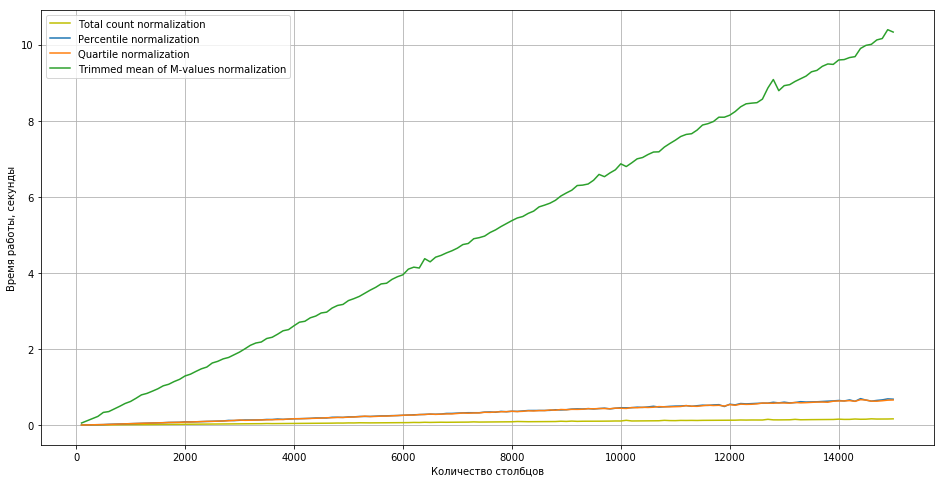

In [5]:
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(1, 1, 1)

ax.plot(data, tc_times_1000_x,'y', label='Total count normalization')
ax.plot(data, p_times_1000_x, label='Percentile normalization')
ax.plot(data, q_times_1000_x, label='Quartile normalization')
ax.plot(data, tmm_times_1000_x, label='Trimmed mean of M-values normalization')

ax.set_ylabel('Время работы, секунды')
ax.set_xlabel('Количество столбцов')

ax.legend(loc='best')
ax.grid(True)

plt.savefig('summary_1000_x_performance_test.png', bbox_inches='tight')

plt.show()